In [83]:
# implementation of LSTM Model to predict the soil temperature for the next 6 months, using Python in jupyter notebook
# Student Name: Gargi Darade
# Subject/Class: CMPS 451 Artificial Intelligence

#Step 1:- Import the required libraries
#Numpy for statistical computations
#Matplotlib to plot the graph 
#make_blobs from sklearn.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#!pip install tensorflow  
import tensorflow as tf

In [84]:
data_path = 'psspredict_new010.csv'

# create pandas dataframe
df = pd.read_csv(data_path)

# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

# print out sample dataset
print(len(df))
df.head()

131998


,date,naturaltemperature_5,windspeedscalar,temperature_1p5,temperature_2,relativehumidity,stationpressure,solarradiation,windspeed_20f
0,1/2/2001 2:00,0.939,-4.308,4.611,4.599,88.60,4.156,0.335,5.325
1,1/2/2001 3:00,0.950,-4.554,4.283,4.273,52.06,3.964,0.494,5.292
2,1/2/2001 4:00,0.958,-4.513,3.359,3.347,70.40,4.891,0.230,3.822
3,1/2/2001 5:00,0.969,-4.670,3.620,3.606,64.33,4.952,0.276,4.345
4,1/2/2001 6:00,0.976,-5.170,3.819,3.807,62.07,4.699,0.327,4.508


In [85]:
# check number of nan values in dataframe
df.isna().sum()

date                    0
naturaltemperature_5    0
windspeedscalar         0
temperature_1p5         0
temperature_2           0
relativehumidity        0
stationpressure         0
solarradiation          0
windspeed_20f           0
dtype: int64

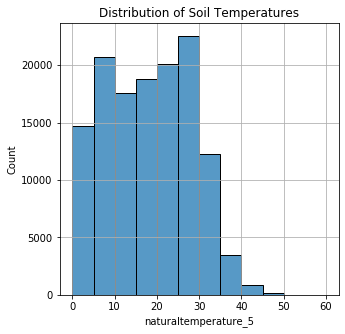

In [86]:
# plot to see the soil temperature varience
#conda update --all
#pip install -U seaborn
plt.figure(figsize=(5, 5))
sns.histplot(df['naturaltemperature_5'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Soil Temperatures")
plt.grid()
#plt.tight_layout()
plt.savefig("SoilTemp2.png")
plt.show()
#sns.histplot(df['windspeedscalar'],bins=[i for i in range(0,61,5)], kde=False)
#plt.title("Distribution of Wind Speed")
#plt.grid()
#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 


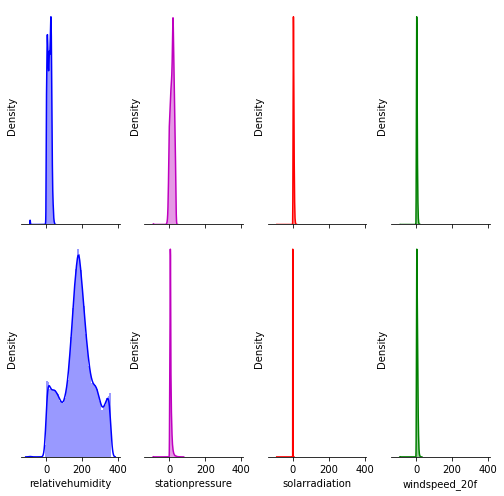

In [87]:
f, axes = plt.subplots(2, 4, figsize=(7, 7), sharex=True)

sns.despine(left=True)

# Plot a simple distribution of the desired columns
sns.distplot(df['naturaltemperature_5'], color="b", ax=axes[0, 0])
sns.distplot(df['windspeedscalar'], color="m", ax=axes[0, 1])
sns.distplot(df['temperature_1p5'], color="r", ax=axes[0, 2])
sns.distplot(df['temperature_2'], color="g", ax=axes[0, 3])
sns.distplot(df['relativehumidity'], color="b", ax=axes[1, 0])
sns.distplot(df['stationpressure'], color="m", ax=axes[1, 1])
sns.distplot(df['solarradiation'], color="r", ax=axes[1, 2])
sns.distplot(df['windspeed_20f'], color="g", ax=axes[1, 3])

plt.setp(axes, yticks=[])
plt.tight_layout()
#plt.grid()
#plt.show()
plt.savefig("sample.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 


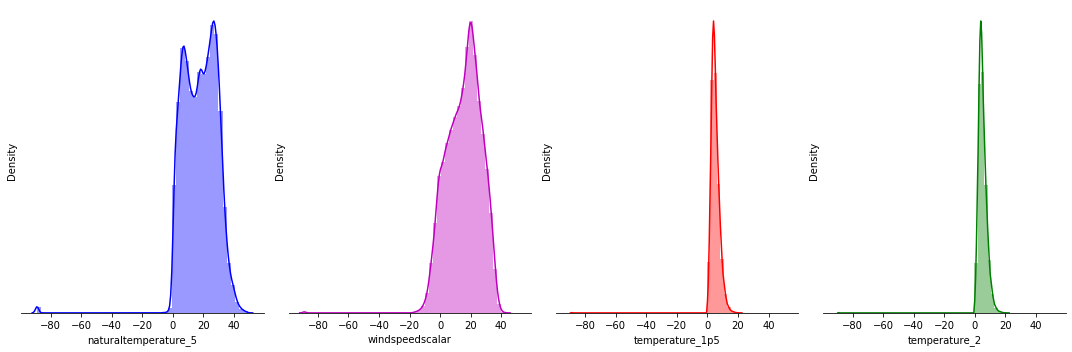

In [88]:
f, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True)

sns.despine(left=True)

# Plot a simple distribution of the desired columns
sns.distplot(df['naturaltemperature_5'], color="b", ax=axes[0])
sns.distplot(df['windspeedscalar'], color="m", ax=axes[1])
sns.distplot(df['temperature_1p5'], color="r", ax=axes[2])
sns.distplot(df['temperature_2'], color="g", ax=axes[3])

plt.setp(axes, yticks=[])
plt.tight_layout()
#plt.grid()
#plt.show()
plt.savefig("sample.png")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 


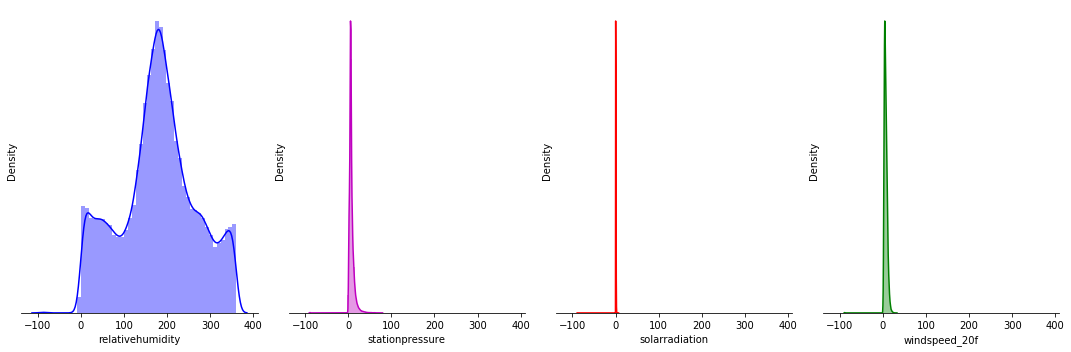

In [89]:
f, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True)

sns.despine(left=True)

# Plot a simple distribution of the desired columns
sns.distplot(df['relativehumidity'], color="b", ax=axes[0])
sns.distplot(df['stationpressure'], color="m", ax=axes[1])
sns.distplot(df['solarradiation'], color="r", ax=axes[2])
sns.distplot(df['windspeed_20f'], color="g", ax=axes[3])

plt.setp(axes, yticks=[])
plt.tight_layout()
#plt.grid()
#plt.show()
plt.savefig("sample1.png")

In [90]:
# set data index as datetime column
df.index = pd.to_datetime(df['date'])
# filter the columns by only the required_columns
required_cols = ['naturaltemperature_5', 'windspeedscalar', 'temperature_1p5', 'temperature_2', 'relativehumidity', 'stationpressure', 'solarradiation', 'windspeed_20f']
df = df[required_cols]
df.head()

,naturaltemperature_5,windspeedscalar,temperature_1p5,temperature_2,relativehumidity,stationpressure,solarradiation,windspeed_20f
date,,,,,,,,
2001-01-02 02:00:00,0.939,-4.308,4.611,4.599,88.60,4.156,0.335,5.325
2001-01-02 03:00:00,0.950,-4.554,4.283,4.273,52.06,3.964,0.494,5.292
2001-01-02 04:00:00,0.958,-4.513,3.359,3.347,70.40,4.891,0.230,3.822
2001-01-02 05:00:00,0.969,-4.670,3.620,3.606,64.33,4.952,0.276,4.345
2001-01-02 06:00:00,0.976,-5.170,3.819,3.807,62.07,4.699,0.327,4.508


In [95]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][0]  # 'naturaltemperature_5' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)


Train X shape: (105590, 10, 8)
Train Y shape: (105590,)
Test X shape: (26398, 10, 8)
Test Y shape: (26398,)


In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [97]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 128)           70144     
                                                                 
 dropout_9 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 64)            49408     
                                                                 
 dropout_10 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [98]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_weights.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
1320/1320 [==============================] - 23s 14ms/step - loss: 0.0075 - val_loss: 8.7919e-04
Epoch 2/100
1320/1320 [==============================] - 19s 15ms/step - loss: 0.0027 - val_loss: 8.0958e-04
Epoch 3/100
1320/1320 [==============================] - 21s 16ms/step - loss: 0.0011 - val_loss: 4.3629e-04
Epoch 4/100
1320/1320 [==============================] - 19s 15ms/step - loss: 4.1244e-04 - val_loss: 6.4938e-04
Epoch 5/100
1320/1320 [==============================] - 20s 15ms/step - loss: 2.3890e-04 - val_loss: 6.9732e-04
Epoch 6/100
1320/1320 [==============================] - 19s 14ms/step - loss: 1.8967e-04 - val_loss: 2.5110e-04
Epoch 7/100
1320/1320 [==============================] - 19s 14ms/step - loss: 1.6482e-04 - val_loss: 3.1614e-04
Epoch 8/100
1320/1320 [==============================] - 19s 15ms/step - loss: 1.6010e-04 - val_loss: 2.4190e-04
Epoch 9/100
1320/1320 [==============================] - 19s 15ms/step - loss: 1.4313e-04 - val_loss: 2.2215

In [99]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('best_model_weights.h5')
test_loss = best_model.evaluate(test_x, test_y)
#provides an estimate of how well the trained model generalizes to new, unseen data
print("Test Loss:", test_loss)

825/825 [==============================] - 4s 4ms/step - loss: 1.7681e-04
Test Loss: 0.00017681172175798565


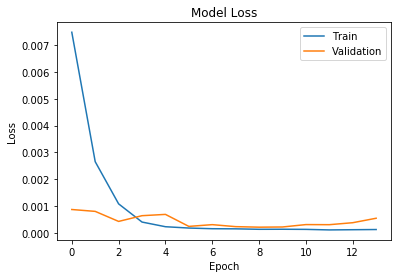

In [100]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("MLoss.png")
plt.show()

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

825/825 [==============================] - 4s 4ms/step
Mean Absolute Error (MAE): 0.004908275340278715
Mean Squared Error (MSE): 0.00017681170242666888
Root Mean Squared Error (RMSE): 0.013297056156408037


In [102]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,0] # 'naturaltemperature_5' column index

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, num_features, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,0] # 'naturaltemperature_5' column index

825/825 [==============================] - 3s 4ms/step


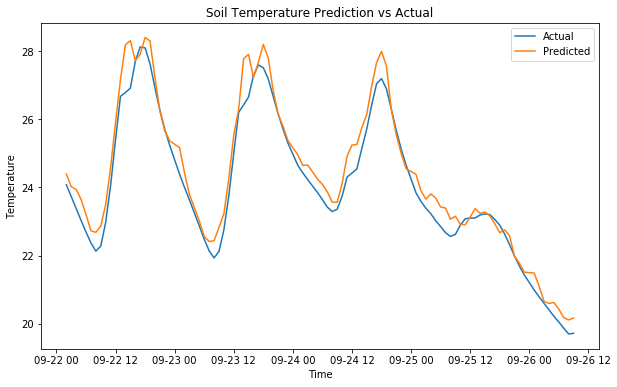

In [103]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Soil Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.savefig("STempPred.png")
plt.show()